In [1]:
pip install pandas scikit-learn gdown xgboost catboost 

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
datasdp = pd.read_csv('D:\AAAAKK SKRIPSWEETT\Bismillah Code Skripsi V2\Dataset\dataset_sdp_undersampling.csv', delimiter=";")
datasdp.head()

,cbo,dit,fanin,fanout,lcom,noc,loc,rfc,wmc,totalMethodsQty,protectedMethodsQty,publicMethodsQty,privateMethodsQty,finalFieldsQty,protectedFieldsQty,publicFieldsQty,privateFieldsQty,bugs
0,5,1,0,5,250,0,470,38,37,36,0,36,0,1,0,0,1,0
1,5,2,4,5,34,0,57,15,15,12,0,12,0,2,0,1,2,0
2,15,3,2,15,13,0,176,31,30,6,0,6,0,0,0,0,2,0
3,5,2,2,5,0,0,46,4,12,6,0,6,0,0,0,0,3,0
4,6,1,0,6,15,0,42,11,6,6,0,6,0,0,0,0,0,0


In [4]:
datasdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   cbo                  1314 non-null   int64
 1   dit                  1314 non-null   int64
 2   fanin                1314 non-null   int64
 3   fanout               1314 non-null   int64
 4   lcom                 1314 non-null   int64
 5   noc                  1314 non-null   int64
 6   loc                  1314 non-null   int64
 7   rfc                  1314 non-null   int64
 8   wmc                  1314 non-null   int64
 9   totalMethodsQty      1314 non-null   int64
 10  protectedMethodsQty  1314 non-null   int64
 11  publicMethodsQty     1314 non-null   int64
 12  privateMethodsQty    1314 non-null   int64
 13  finalFieldsQty       1314 non-null   int64
 14  protectedFieldsQty   1314 non-null   int64
 15  publicFieldsQty      1314 non-null   int64
 16  privateFieldsQty     131

In [5]:
datasdp.describe()

,cbo,dit,fanin,fanout,lcom,noc,loc,rfc,wmc,totalMethodsQty,protectedMethodsQty,publicMethodsQty,privateMethodsQty,finalFieldsQty,protectedFieldsQty,publicFieldsQty,privateFieldsQty,bugs
count,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000
mean,6.686454,1.592085,3.709285,6.686454,338.796043,0.235921,134.684170,21.424658,31.296804,11.816591,1.359209,7.687215,1.442161,1.368341,0.093607,0.444444,2.522070,0.432268
std,8.933145,1.100217,18.917807,8.933145,3015.686597,1.356170,310.092242,43.409342,92.515717,26.683368,13.170233,17.638376,6.002672,3.687500,1.557598,3.898996,6.215467,0.495580
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,2.000000,0.000000,0.000000,12.000000,1.000000,3.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,1.000000,0.000000,4.000000,3.000000,0.000000,44.000000,8.000000,7.000000,5.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,8.000000,2.000000,2.000000,8.000000,22.000000,0.000000,121.000000,23.750000,24.000000,11.000000,0.000000,8.000000,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000
max,134.000000,10.000000,405.000000,134.000000,64947.000000,18.000000,4133.000000,545.000000,1758.000000,374.000000,366.000000,315.000000,87.000000,58.000000,54.000000,123.000000,116.000000,1.000000


In [ ]:
datasdp = pd.read_csv('D:\AAAAKK SKRIPSWEETT\Bismillah Code Skripsi V2\Dataset\dataset_sdp_undersampling.csv', delimiter=";")

X = datasdp.drop(columns=['bugs'])
y = datasdp['bugs']

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_base, X_train_meta, y_train_base, y_train_meta = train_test_split(X_train, y_train, test_size=0.5, random_state=42)
base_models = [AdaBoostClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), HistGradientBoostingClassifier(), XGBClassifier(), CatBoostClassifier()]

In [ ]:
counts_training = y_train.value_counts()
print("data distribiution data training: ", counts_training)
counts_testing = y_train_base.value_counts()
print("data distribiution data testing: ", counts_testing)

data distribiution data training:  bugs
0    593
1    458
Name: count, dtype: int64
data distribiution data testing:  bugs
0    286
1    239
Name: count, dtype: int64


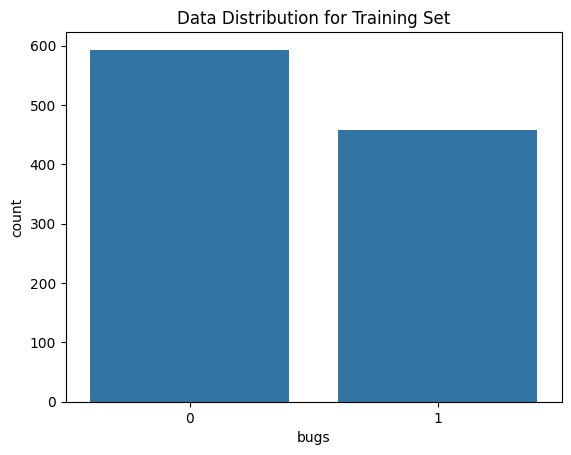

In [23]:
sns.countplot(x=y_train, data=X_train)
plt.title('Data Distribution for Training Set')
plt.show()

In [ ]:
base_models = [AdaBoostClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), HistGradientBoostingClassifier(), XGBClassifier(), CatBoostClassifier()]
base_model_preds = []
for model in base_models:
    model.fit(X_train_base, y_train_base)
    pred = model.predict(X_train_meta)
    base_model_preds.append(pred)

stacking_dataset = np.column_stack(base_model_preds)
meta_model = LogisticRegression()
meta_model.fit(stacking_dataset, y_train_meta)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Learning rate set to 0.007824
0:	learn: 0.6887909	total: 2.39ms	remaining: 2.38s
1:	learn: 0.6861648	total: 4.26ms	remaining: 2.13s
2:	learn: 0.6832713	total: 6.07ms	remaining: 2.02s
3:	learn: 0.6805746	total: 7.83ms	remaining: 1.95s
4:	learn: 0.6777547	total: 9.71ms	remaining: 1.93s
5:	learn: 0.6734711	total: 11.5ms	remaining: 1.91s
6:	learn: 0.6692200	total: 13.8ms	remaining: 1.96s
7:	learn: 0.6641282	total: 16ms	remaining: 1.99s
8:	learn: 0.6610217	total: 17.9ms	remaining: 1.97s
9:	learn: 0.6569466	total: 19.7ms	remaining: 1.95s
10:	learn: 0.6527881	total: 21.5ms	remaining: 1.93s
11:	learn: 0.6489214	total: 23.5ms	remaining: 1.93s
12:	learn: 0.6461985	total: 25.4ms	remaining: 1.93s
13:	learn: 0.6420678	total: 27.1ms	remaining: 1.91s
14:	learn: 0.6389371	total: 29.3ms	remaining: 1.92s
15:	learn: 0.6355034	total: 31.4ms	remaining: 1.93s
16:	learn: 0.6319206	total: 33.3ms	remaining: 1.92s
17:	learn: 0.6284978	total: 35.2ms	remaining: 1.92s
18:	learn: 0.6259233	total: 36.9ms	remaining: 

LogisticRegression()

In [25]:
#implementing stacking from previous meta model dataset
holdout_preds = []
for model in base_models:
    pred = model.predict(X_holdout)
    holdout_preds.append(pred)

stacking_holdout_dataset = np.column_stack(holdout_preds)
meta_model_holdout_preds = meta_model.predict(stacking_holdout_dataset)

Accuracy: 83.65%
Precision: 80.18%
Recall: 80.91%
F1score: 80.54%
Roc_auc: 83.27%
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       153
           1       0.80      0.81      0.81       110

    accuracy                           0.84       263
   macro avg       0.83      0.83      0.83       263
weighted avg       0.84      0.84      0.84       263



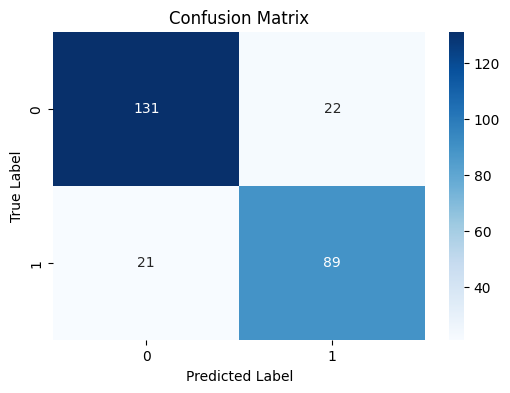

In [27]:
#evaluation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, classification_report

accuracy = accuracy_score(y_holdout, meta_model_holdout_preds)
precision = precision_score(y_holdout, meta_model_holdout_preds)
recall = recall_score(y_holdout, meta_model_holdout_preds)
f1score = f1_score(y_holdout, meta_model_holdout_preds)
roc_auc = roc_auc_score(y_holdout, meta_model_holdout_preds)

print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1score: {f1score*100:.2f}%')
print(f'Roc_auc: {roc_auc*100:.2f}%')
print(classification_report(y_holdout, meta_model_holdout_preds))

# Compute confusion matrix
cm = confusion_matrix(y_holdout, meta_model_holdout_preds)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()